In [1]:
import networkx as nx

In [4]:
G = nx.read_gml('processed/years/2018-grouped/orig/month-1.gml')

In [5]:
G.number_of_nodes(), G.number_of_edges()

(255, 13784)

In [6]:
import glob

null_models = glob.glob('processed/years/2018-grouped/null/month-1-*.gml')

## (global) efficiency

In [46]:
# https://github.com/aestrivex/bctpy/blob/1b40e281eda081060707e30b68106ac1ebf54130/bct/algorithms/distance.py#L107f

# https://github.com/aestrivex/bctpy/blob/master/bct/algorithms/efficiency.py

In [45]:
from bct.algorithms.efficiency import efficiency_wei

In [43]:
A = nx.to_numpy_array(G, weight='duration_weights')

In [44]:
An = A / A.max()

In [52]:
orig_result = efficiency_wei(An, 'global')

In [49]:
def do_efficiencies(filename):

    try:
        G = nx.read_gml(filename)
        A = nx.to_numpy_array(G, weight='duration_weights')
        An = A / A.max()
        return efficiency_wei(An, 'global')
    except Exception as e:
        return None

import multiprocessing as mp

with mp.Pool() as pool:
    results = pool.map(do_efficiencies, null_models, chunksize=1)

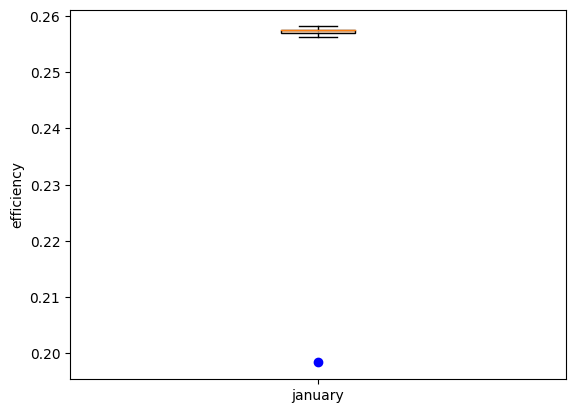

In [60]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
fruit_weights = [
    results
]
labels = ['january']
colors = ['peachpuff']

fig, ax = plt.subplots()
ax.set_ylabel('efficiency')

bplot = ax.boxplot(fruit_weights,
                   patch_artist=True,  # fill with color
                   labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.plot(1, orig_result, 'bo')

plt.show()

## motifs

In [9]:
# https://github.com/aestrivex/bctpy/blob/1b40e281eda081060707e30b68106ac1ebf54130/bct/algorithms/motifs.py#L405

In [91]:
from bct.algorithms.motifs import motif3struct_wei, make_motif34lib, find_motif34

In [74]:
make_motif34lib()

In [86]:
A = nx.to_numpy_array(G, weight='tpd_weights')

In [88]:
An = A / A.max()

In [89]:
I, Q, F = motif3struct_wei(An)

In [107]:
orig_result = I[0,0] # first node, first motif

In [108]:
def do_motifs(filename):

    try:
        G = nx.read_gml(filename)
        A = nx.to_numpy_array(G, weight='tpd_weights')
        An = A / A.max()
        I, Q, F = motif3struct_wei(An)
        return I[0,0]
    except Exception as e:
        return None

import multiprocessing as mp

with mp.Pool() as pool:
    results = pool.map(do_motifs, null_models, chunksize=1)

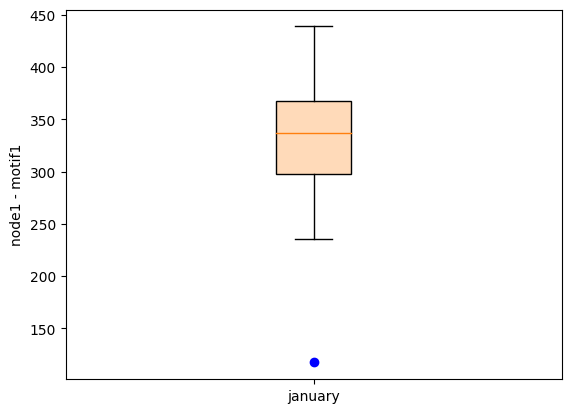

In [110]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
fruit_weights = [
    results
]
labels = ['january']
colors = ['peachpuff']

fig, ax = plt.subplots()
ax.set_ylabel('node1 - motif1')

bplot = ax.boxplot(fruit_weights,
                   patch_artist=True,  # fill with color
                   labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.plot(1, orig_result, 'bo')

plt.show()

## strength and eigenvector centrality

In [10]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html

In [115]:
orig_result_in = nx.eigenvector_centrality(G, weight='tpd_weights')['7000'] # in eigenvector
orig_result_out = nx.eigenvector_centrality(G.reverse(), weight='tpd_weights')['7000'] # out eigenvector

In [116]:
def do_eig(filename):

    try:
        G = nx.read_gml(filename)
        in_eig = nx.eigenvector_centrality(G, weight='tpd_weights')['7000'] # in eigenvector
        out_eig = nx.eigenvector_centrality(G.reverse(), weight='tpd_weights')['7000'] # out eigenvector
        return (in_eig, out_eig)
    except Exception as e:
        return None

import multiprocessing as mp

with mp.Pool() as pool:
    results = pool.map(do_eig, null_models, chunksize=1)

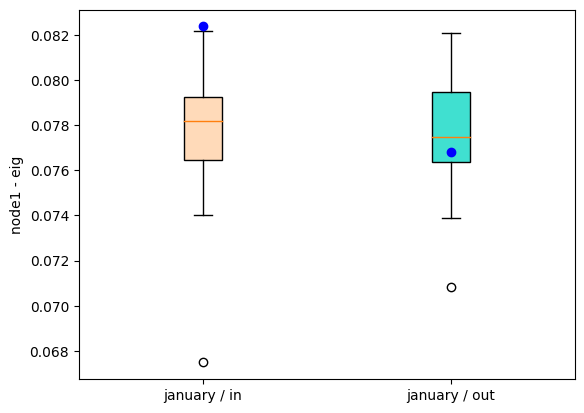

In [118]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

in_results, out_results = zip(*results)
fruit_weights = [
    in_results,
    out_results
]
labels = ['january / in', 'january / out']
colors = ['peachpuff', 'turquoise']

fig, ax = plt.subplots()
ax.set_ylabel('node1 - eig')

bplot = ax.boxplot(fruit_weights,
                   patch_artist=True,  # fill with color
                   labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.plot(1, orig_result_in, 'bo')
ax.plot(2, orig_result_out, 'bo')


plt.show()

## betweenness centrality 